# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dani Harsalisman F. P.
- **Email:** danihfp123@gmail.com
- **ID Dicoding:** harsalis06

## Menentukan Pertanyaan Bisnis

- Pada hari apa penggunaan sepeda mengalami trend tertinggi?
- Di musim apakah pengguna paling banyak memakai/menyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [6]:
hari_df = pd.read_csv('day.csv')
jam_df = pd.read_csv('hour.csv')

In [7]:
# Menampilkan 5 data teratas pada dataset Hari
hari_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
# Menampilkan 5 data teratas pada dataset Jam
jam_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


=========================================
**Dataset characteristics**
=========================================

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered



### Assessing Data

In [9]:
# Memeriksa Tipe Data Pada Hari & JAM
print("---Tipe Data Hari---")
hari_df.info()

print("---Tipe Data Jam---")
jam_df.info()

---Tipe Data Hari---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
---Tipe Data Jam---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17

In [10]:
# Memeriksa Missing Value Pada Hari
hari_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Memeriksa Missing Value Pada Jam
jam_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
# Memeriksa Adanya Duplicated Data dari Data Hari & Jam
print("Jumlah data duplikat (Hari): ", hari_df.duplicated().sum())

print("Jumlah data duplikat (Jam): ", jam_df.duplicated().sum())

Jumlah data duplikat (Hari):  0
Jumlah data duplikat (Jam):  0


In [13]:
# Memeriksa Struktur Data Parameter Statistik pada Hari
hari_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [14]:
# Memeriksa Struktur Data Parameter Statistik pada Jam
jam_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
 - Terdapat kolom data dengan nama dteday bertipe data object, seharusnya tipe datanya merupakan date/datetime untuk menunjukkan waktu dan tanggal lebih baik.
 - Memeriksa adanya data yang kosong atau tidak.
 - Memeriksa ada tidaknya data duplikat dan missing value.

### Cleaning Data

In [15]:
# Mengubah Tipe Data Pada Kolom dteday
hari_df['dteday'] = pd.to_datetime(hari_df['dteday'])
jam_df['dteday'] = pd.to_datetime(jam_df['dteday'])

In [16]:
# Mengubah Nama Pada Data Hari
hari_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace=True)

In [17]:
# Mengubah Nama Pada Data Jam
jam_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace=True)

In [18]:
# Merubah Isi Data Pada Kolom Season
season_mapping = {
    1: 'springer',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

hari_df['season'] = hari_df['season'].map(season_mapping)
jam_df['season'] = jam_df['season'].map(season_mapping)

In [19]:
# Merubah Isi Data Pada Kolom Tahun
year_mapping = {
    0: 2011,
    1: 2012
}

hari_df['year'] = hari_df['year'].map(year_mapping)
jam_df['year'] = jam_df['year'].map(year_mapping)

In [20]:
# Merubah Isi Data Pada Kolom Month (Bulan)
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'Juny',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

hari_df['month'] = hari_df['month'].map(month_mapping)
jam_df['month'] = jam_df['month'].map(month_mapping)

In [21]:
# Merubah Isi Data Pada Kolom Weekday
weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

hari_df['weekday'] = hari_df['weekday'].map(weekday_mapping)
jam_df['weekday'] = jam_df['weekday'].map(weekday_mapping)

In [22]:
# Merubah Isi Data Pada Kolom Weather
weather_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow',
    4: 'Heavy Rain'
}

hari_df['weather'] = hari_df['weather'].map(weather_mapping)
jam_df['weather'] = jam_df['weather'].map(weather_mapping)

In [23]:
hari_df.head(5)

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,springer,2011,January,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,January,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [24]:
jam_df.head(5)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,springer,2011,January,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,January,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,January,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,January,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,January,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mengubah tipe data pada kolom dteday menjadi bertipe data datetime.
- Mengubah nama kolom pada tertentu agar mudah dibaca dan dipahami.
- Mengubah isi data pada kolom season, year, month, weekday, dan weather sesuai dengan karakteristik datanya masing-masing.

## Exploratory Data Analysis (EDA)

### Explore Dataset Hari & Jam

In [25]:
hari_df.sample(5)

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
124,125,2011-05-05,summer,2011,May,0,Thursday,1,Clear,0.459167,0.441917,0.444167,0.295392,614,3819,4433
209,210,2011-07-29,fall,2011,July,0,Friday,1,Clear,0.838333,0.785967,0.542500,0.174138,670,3176,3846
431,432,2012-03-07,springer,2012,March,0,Wednesday,1,Clear,0.404167,0.385100,0.513333,0.345779,432,4484,4916
241,242,2011-08-30,fall,2011,August,0,Tuesday,1,Clear,0.639167,0.594704,0.548333,0.125008,775,4429,5204
132,133,2011-05-13,summer,2011,May,0,Friday,1,Mist,0.512500,0.494300,0.863333,0.179725,692,3413,4105


In [26]:
hari_df.describe(include='all')

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,January,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [27]:
hari_df.instant.is_unique

True

In [28]:
hari_df.instant.duplicated().sum()

0

In [29]:
all_df = pd.merge(hari_df, jam_df, on='date')
all_df['weekday'] = all_df['date'].dt.day_name()
all_df.head(5)

,instant_x,date,season_x,year_x,month_x,holiday_x,weekday_x,workingday_x,weather_x,temp_x,...,workingday_y,weather_y,temp_y,atemp_y,humidity_y,windspeed_y,casual_y,registered_y,count_y,weekday
0,1,2011-01-01,springer,2011,January,0,Saturday,0,Mist,0.344167,...,0,Clear,0.24,0.2879,0.81,0.0,3,13,16,Saturday
1,1,2011-01-01,springer,2011,January,0,Saturday,0,Mist,0.344167,...,0,Clear,0.22,0.2727,0.80,0.0,8,32,40,Saturday
2,1,2011-01-01,springer,2011,January,0,Saturday,0,Mist,0.344167,...,0,Clear,0.22,0.2727,0.80,0.0,5,27,32,Saturday
3,1,2011-01-01,springer,2011,January,0,Saturday,0,Mist,0.344167,...,0,Clear,0.24,0.2879,0.75,0.0,3,10,13,Saturday
4,1,2011-01-01,springer,2011,January,0,Saturday,0,Mist,0.344167,...,0,Clear,0.24,0.2879,0.75,0.0,0,1,1,Saturday


In [30]:
relevants = ['temp_x', 'atemp_x', 'humidity_x', 'casual_x', 'registered_x', 'count_x']
for col in relevants:
  min_values = all_df[col].min()
  max_values = all_df[col].max()
  print(f"Rentang nilai {col} antara {min_values} - {max_values}")

Rentang nilai temp_x antara 0.0591304 - 0.861667
Rentang nilai atemp_x antara 0.0790696 - 0.840896
Rentang nilai humidity_x antara 0.0 - 0.9725
Rentang nilai casual_x antara 2 - 3410
Rentang nilai registered_x antara 20 - 6946
Rentang nilai count_x antara 22 - 8714


In [31]:
# Cek Penggunaan Sepeda Berdasarkan Musim
all_df.groupby(by='season_x').agg({
    'weekday_x': 'count',
    'month_x' : 'nunique',
    'instant_x': 'nunique',
    'count_x': 'nunique',
    'count_y': 'nunique'
}).sort_values(by='season_x', ascending=False).reset_index()

,season_x,weekday_x,month_x,instant_x,count_x,count_y
0,winter,4232,4,178,176,690
1,summer,4409,4,184,182,721
2,springer,4242,4,181,179,482
3,fall,4496,4,188,188,760


In [32]:
# Cek Penggunaan Sepeda Berdasarkan Bulan
all_df.groupby(by='month_x').agg({
    'weekday_x': 'count',
    'season_x' : 'nunique',
    'instant_x': 'nunique',
    'count_x': 'nunique',
    'count_y': 'nunique'
}).sort_values(by='month_x', ascending=True).reset_index()

,month_x,weekday_x,season_x,instant_x,count_x,count_y
0,April,1437,1,60,60,502
1,August,1475,1,62,62,560
2,December,1483,2,62,62,428
3,February,1341,1,57,57,343
4,January,1429,1,62,62,314
5,July,1488,1,62,62,551
6,Juny,1440,2,60,60,558
7,March,1473,2,62,60,440
8,May,1488,1,62,62,551
9,November,1437,1,60,60,480


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada hari apa penggunaan sepeda mengalami trend tertinggi?

C:\Users\Dani Harsalisman\AppData\Local\Temp\ipykernel_23824\2787795933.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='weekday_x', y='count_x', data=all_df, ci=None)


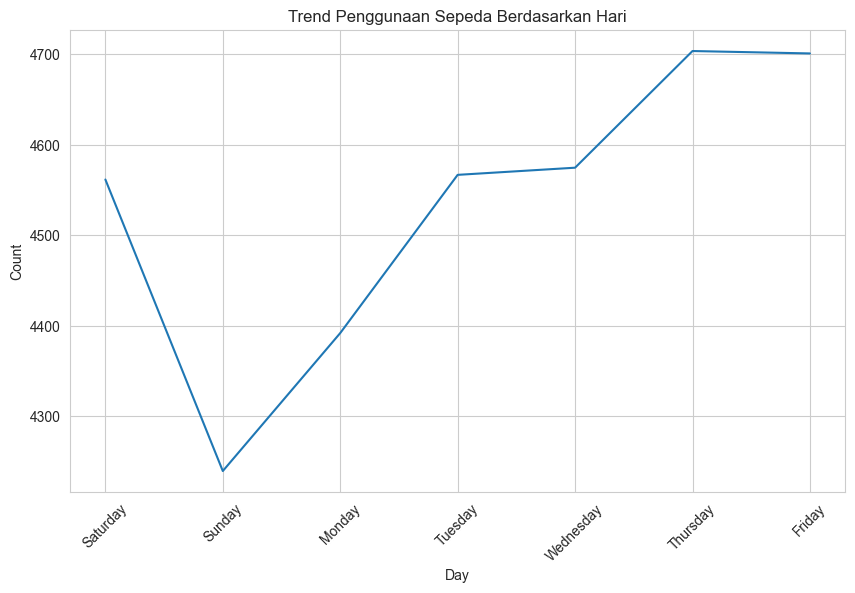

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='weekday_x', y='count_x', data=all_df, ci=None)
plt.title('Trend Penggunaan Sepeda Berdasarkan Hari')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Pertanyaan 2: Di musim apakah pengguna paling banyak memakai/menyewa sepeda?

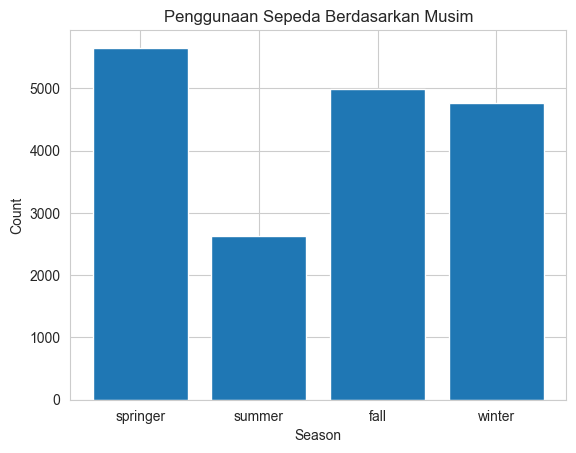

In [34]:
season_max = all_df.groupby(by='season_x')['count_x'].mean()
season_name = ['springer', 'summer', 'fall', 'winter']
plt.bar(season_name, season_max)
plt.title('Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

## Conclusion

- Conclution pertanyaan 1: Penggunaan sepeda jika dilihat trendnya berdasarkan hari menunjukkan bahwa pada hari sabtu ke minggu terjadi penurunan, dan mengalami kenaikan ketika memasuki weekday. Pada diagram tersebut hari dengan pengguna tertinggi adalah hari kamis atau thursday.
- Conclution pertanyaan 2: Penggunaan sepeda paling banyak ketika memasuki musim 'springer', disusul oleh musim 'fall' lalu diurutan ketiga ada musim 'winter'.

In [35]:
all_df.to_csv('data.csv', index=False)